<a href="https://colab.research.google.com/github/Mbashas/data_decisions/blob/main/medical_insurance_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Insurance Cost Prediction Using Linear Regression

**Name:** Mbasha Seth  
**Course:** Data and Decisions

**Date:** 5th October 2025


---

## Project Overview

This project demonstrates the application of linear regression modeling to predict medical insurance costs based on various demographic and health-related factors. The analysis includes:

- **Dataset:** Medical Insurance Cost Prediction dataset with multiple categorical variables
- **Objective:** Build a linear regression model to predict insurance charges
- **Key Features:** Age, sex, BMI, number of children, smoking status, and region

---

## 1. Data Import and Setup


In [ ]:
import kagglehub
import os

# Download the dataset
rahulvyasm_medical_insurance_cost_prediction_path = kagglehub.dataset_download('rahulvyasm/medical-insurance-cost-prediction')

print('Data source import complete.')
print(f'Dataset downloaded to: {rahulvyasm_medical_insurance_cost_prediction_path}')

Data source import complete.
Dataset downloaded to: /Users/pro/.cache/kagglehub/datasets/rahulvyasm/medical-insurance-cost-prediction/versions/1


In [ ]:
# List all files in the downloaded dataset directory
for dirname, _, filenames in os.walk(rahulvyasm_medical_insurance_cost_prediction_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/pro/.cache/kagglehub/datasets/rahulvyasm/medical-insurance-cost-prediction/versions/1/medical_insurance.csv


### Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---

## 2. Data Collection and Loading

In [ ]:
# Loading the dataset from a csv file
csv_path = os.path.join(rahulvyasm_medical_insurance_cost_prediction_path, "medical_insurance.csv")
insurance_dataset = pd.read_csv(csv_path)

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_dataset.shape

(2772, 7)

In [ ]:
# Information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---

## 3. Exploratory Data Analysis

Exploration of the dataset to understand the distributions and relationships between variables.

### Statistical Summary

In [ ]:
# Statistial measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


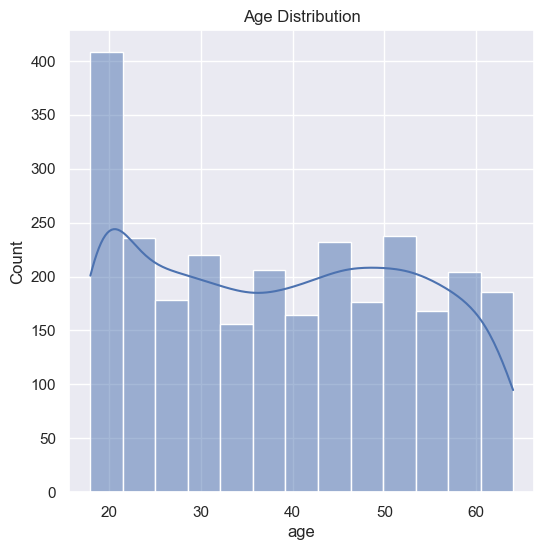

In [ ]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

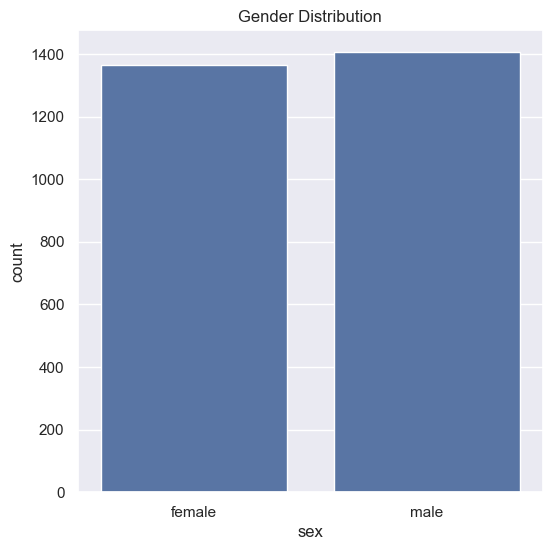

In [ ]:
# Distribution for the gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

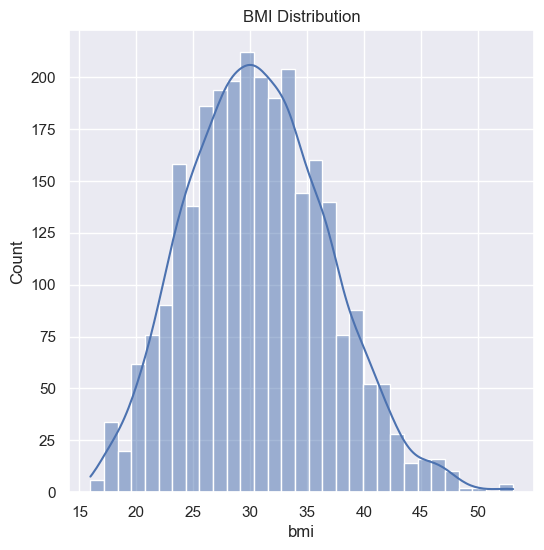

In [ ]:
# Distribution of BMI value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

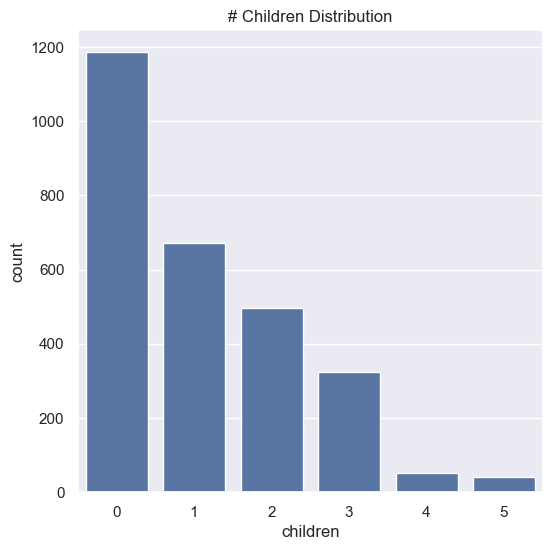

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

In [ ]:
# Distribution for the Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data = insurance_dataset)
plt.title('# Children Distribution')
plt.show()
insurance_dataset['children'].value_counts()

---

## 4. Data Preprocessing

### Handling Categorical Variables

The dataset contains three categorical variables that need to be converted to numerical format for the linear regression model:

- **Binary Variables (sex, smoker):** Encoded using label encoding
- **Nominal Variable (region):** Encoded using one-hot encoding to create dummy variables

One-hot encoding is preferred for the 'region' variable to avoid implying any ordinal relationship between regions. We'll drop one dummy variable to prevent dummy trap.

### Encoding Implementation

In [ ]:
# Encoding binary categorical variables
insurance_dataset.replace({'sex':{'male':1,'female':0}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)  # Fixed: yes=1 (higher risk)

# One-hot encoding for region (nominal variable)
# This creates dummy variables and drops the first category to avoid multicollinearity
insurance_dataset = pd.get_dummies(insurance_dataset, columns=['region'], drop_first=True)

insurance_dataset.head()

/var/folders/mp/xmy3p64s6jq10mbvpp99z2mh0000gn/T/ipykernel_50665/613521988.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':1,'female':0}}, inplace=True)
/var/folders/mp/xmy3p64s6jq10mbvpp99z2mh0000gn/T/ipykernel_50665/613521988.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':1,'no':0}}, inplace=True)  # Fixed: yes=1 (higher risk)


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [ ]:
# Check the new shape after one-hot encoding
print(f"Dataset shape after encoding: {insurance_dataset.shape}")
print(f"\nNew columns created for region:")
print([col for col in insurance_dataset.columns if 'region' in col])


Dataset shape after encoding: (2772, 9)

New columns created for region:
['region_northwest', 'region_southeast', 'region_southwest']


---

## 5. Model Building

### Step 1: Defining Features and Target Variable

We separate the dataset into:
- **Features (X):** Independent variables used for prediction (age, sex, bmi, children, smoker, region dummy variables)
- **Target (Y):** Dependent variable we want to predict (charges)

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

### Step 2: Splitting Data into Training and Testing Sets

We split the data into:
- **Training Set (80%):** Used to train the model
- **Testing Set (20%):** Used to evaluate the model's performance on unseen data

This helps assess how well the model generalizes to new data.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

### Step 3: Training the Linear Regression Model

We initialize and train a Linear Regression model using the training data. The model learns the relationship between the features and the target variable.

In [ ]:
# Loading the Linear Regression Model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

---

## 6. Model Evaluation and Interpretation

### Performance Metrics

We evaluate the model using the **R² (R-squared) score**, which measures the proportion of variance in the target variable explained by the model:

- **R² = 1:** Perfect prediction
- **R² = 0:** Model is no better than predicting the mean
- **R² < 0:** Model performs worse than predicting the mean

### Training Data Performance

In [ ]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R Squared Value for Training Data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R² (Training Data) =', r2_train)
print(f'\nInterpretation: The model explains {r2_train*100:.2f}% of the variance in insurance costs on the training data.')

R² (Training Data) = 0.756346683591589

Interpretation: The model explains 75.63% of the variance in insurance costs on the training data.


### Testing Data Performance


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R Squared Value for Test Data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R² (Test Data) =', r2_test)
print(f'\nInterpretation: The model explains {r2_test*100:.2f}% of the variance in insurance costs on the test data.')



R² (Test Data) = 0.7285703173274255

Interpretation: The model explains 72.86% of the variance in insurance costs on the test data.


---

## 7. Summary and Conclusions

### Key Findings

- Training R²: 0.7563 (75.63% variance explained)
- Testing R²: 0.7286 (72.86% variance explained)
- Successfully handled categorical variable as binary and dummy varibale using one-hot encoding
- The close proximity of training and testing R² scores (difference of ~2.77%) indicates minimal overfitting
- The model generalizes well to unseen data
- Approximately 73-76% of insurance cost variance can be explained by the features in our model

### Interpretation

The linear regression model demonstrates solid predictive capability for medical insurance costs. The R² values above 0.72 suggest that the demographic and health-related variables (age, sex, BMI, children, smoking status, and region) are significant predictors of insurance charges.

The minimal difference between training and testing performance indicates that the model is robust and not overfitting to the training data, which is crucial for real-world applications where the model needs to make accurate predictions on new, unseen data.
